In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [2]:
file_csv = '/srv/network_analysis_outputs/shank3_1_t3/Network_outputs/Compiled_Networks.csv'

data_df = pd.read_csv(file_csv)

In [3]:
df = data_df.replace(np.NaN,0.0)
df

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,cov_Burst_Peak_Abs,mean_BurstDuration,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor
0,2,7,1,WT,22-Nov-2023 15:37:36,M07039,12.738095,99.807964,5.345774,64.217119,...,64.217119,1.050000,0,0.482465,351.623279,0.129699,128.639955,0.267953,81.249719,87.111788
1,2,7,2,WT,22-Nov-2023 15:37:36,M07039,6.963415,111.791361,3.443742,55.798294,...,55.798294,0.602381,0,0.475483,352.205973,0.140053,114.964690,0.272309,79.942860,37.805449
2,2,7,3,WT,22-Nov-2023 15:37:36,M07039,10.788889,71.580682,4.991858,55.826386,...,55.826386,0.942857,0,0.442506,326.874877,0.123337,116.845355,0.269945,80.990139,58.858131
3,2,7,4,WT,22-Nov-2023 15:37:36,M07039,28.175000,123.517359,13.743862,34.789509,...,34.789509,0.811111,0,0.475382,346.864005,0.058010,156.635462,0.271656,81.021126,205.814347
4,2,7,5,WT,22-Nov-2023 15:37:36,M07039,25.850000,119.746166,12.056884,37.088117,...,37.088117,0.954545,0,0.488722,328.943525,0.068270,149.509865,0.272408,82.018747,182.831088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,70,30,1,HET,15-Dec-2023 10:38:39,M07301,4.400000,44.680041,10.829336,37.387046,...,37.387046,0.417647,0,0.437361,285.690945,0.028178,203.430347,0.171933,123.173791,929.568417
115,70,30,2,HET,15-Dec-2023 10:38:39,M07301,3.468235,56.264523,10.733921,29.383062,...,29.383062,0.444186,0,0.362364,271.296953,0.035796,228.291516,0.152802,136.321349,965.779810
116,70,30,3,HET,15-Dec-2023 10:38:39,M07301,4.038356,52.187121,11.376312,24.279441,...,24.279441,0.422973,0,0.411364,297.951040,0.031566,245.539809,0.151453,129.769210,947.491643
117,70,30,4,HET,15-Dec-2023 10:38:39,M07301,4.297101,47.622149,10.005182,33.595092,...,33.595092,0.557143,0,0.441341,313.753534,0.032573,203.070303,0.157551,136.196836,917.164712


In [4]:
div = df['DIV'].unique()
print(div)

[ 7 13 16 20 23 27 30]


In [5]:
chip_id = df['Chip_ID'].unique()
print(chip_id)

['M07039' 'M07299' 'M07301']


In [6]:
df['NeuronType'] = df['NeuronType'].str.strip()
unique_genotypes = df['NeuronType'].unique()
#unique_genotypes =['WT cortex','HET cortex']
print(unique_genotypes)

['WT' 'HET']


## Without outlier removal

In [7]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor'],
      dtype='object')

In [8]:
colors = ['royalblue','brown']
markers = ['o','s','d','*','^']

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']


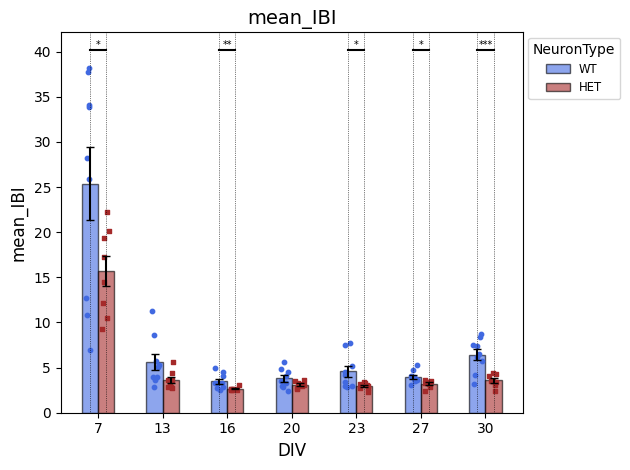

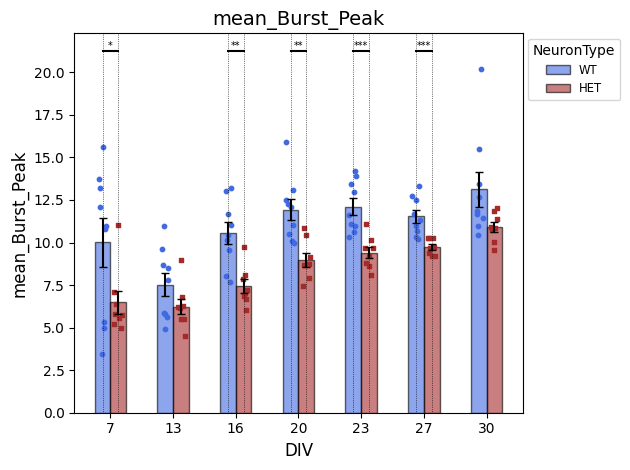

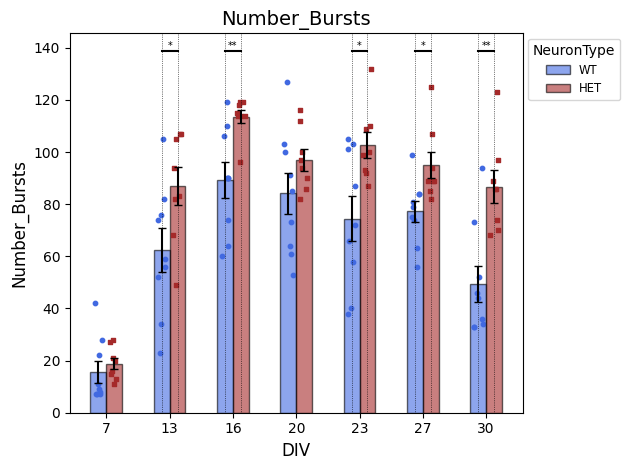

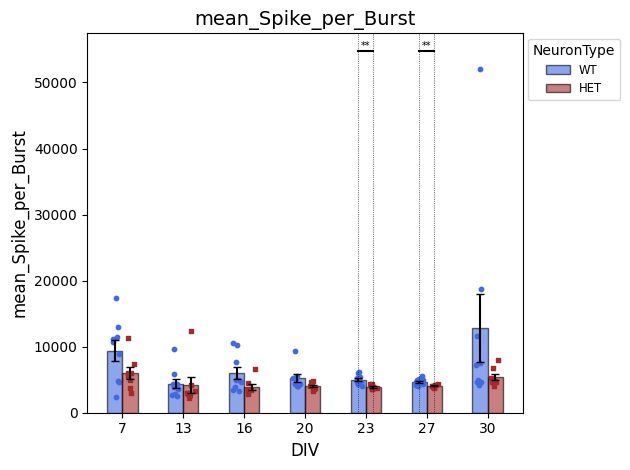

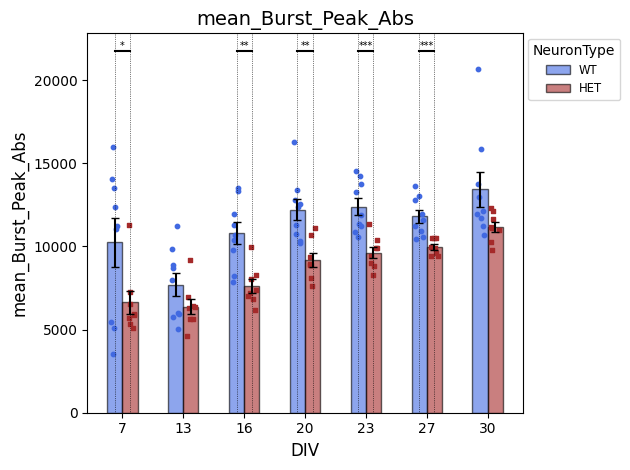

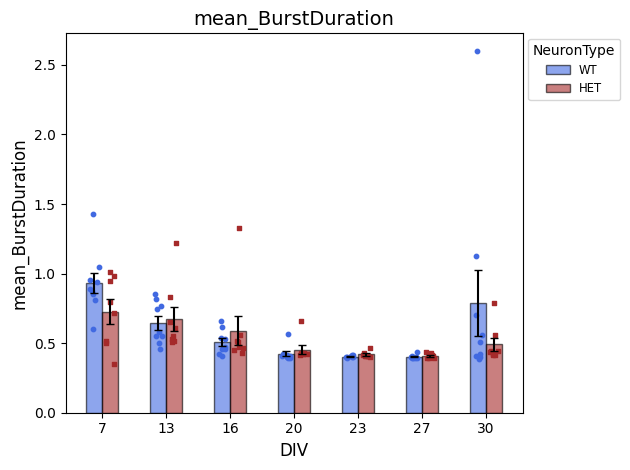

In [9]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst', 'mean_Burst_Peak_Abs',
     'mean_BurstDuration']





dirpath = '/srv/network_analysis_outputs/shank3_1_t3/graphs/with_outlier'
for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

## With the outlier removal

In [10]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor'],
      dtype='object')

In [11]:
#exclude chips

#maxtwo exclude
exclude_list = [('M07299', 2), ('M07299', 4)]

if exclude_list:
    # Using list comprehension for filtering
    print("hello")
    mask = [(row.Chip_ID, row.Well) in exclude_list for index, row in df.iterrows()]
    df = df[~pd.Series(mask)]

hello


In [12]:
print(df[['Chip_ID', 'Well']].drop_duplicates())

   Chip_ID  Well
0   M07039     1
1   M07039     2
2   M07039     3
3   M07039     4
4   M07039     5
5   M07039     6
6   M07299     1
8   M07299     3
10  M07299     5
11  M07299     6
12  M07301     1
13  M07301     2
14  M07301     3
15  M07301     4
16  M07301     5


In [13]:
colors = ['royalblue','indianred']
markers=['s','o']

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']


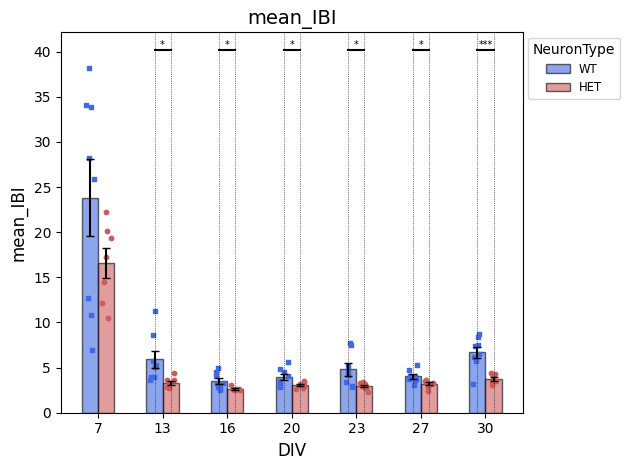

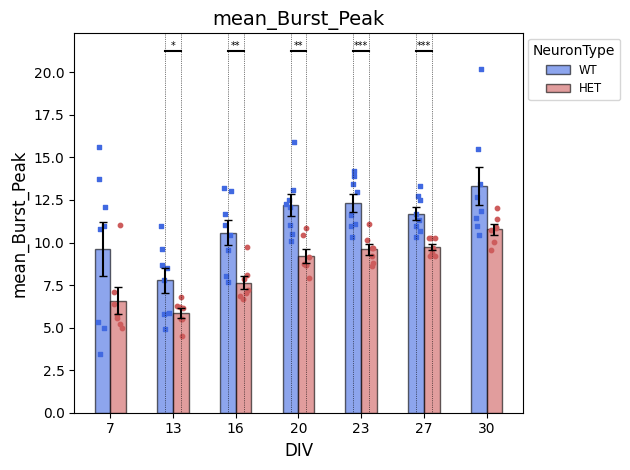

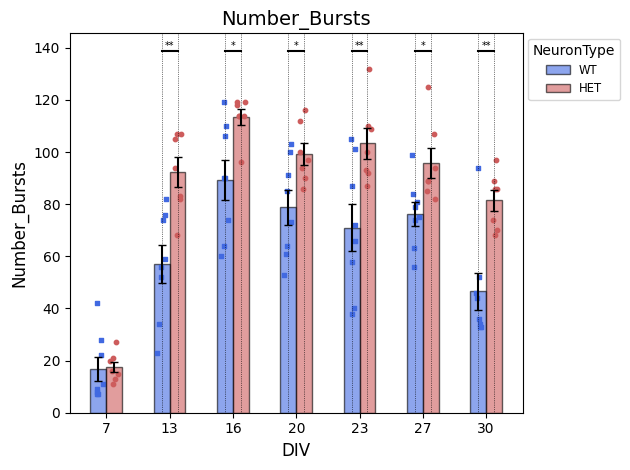

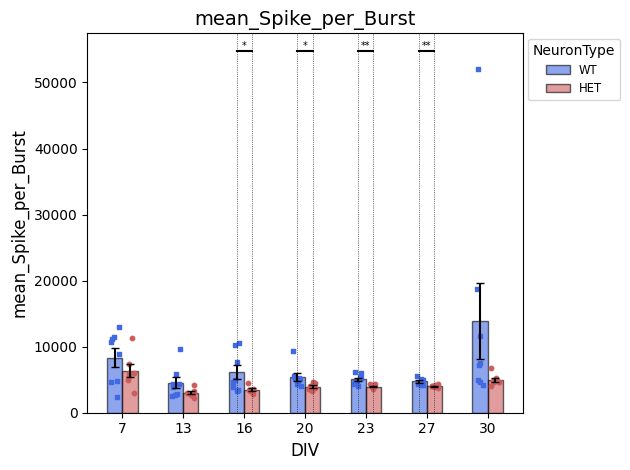

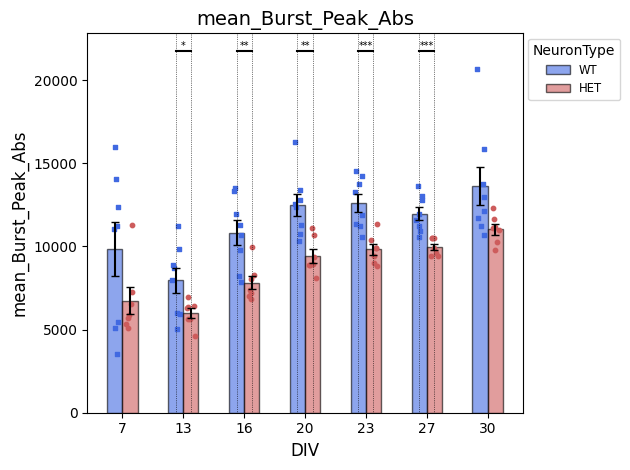

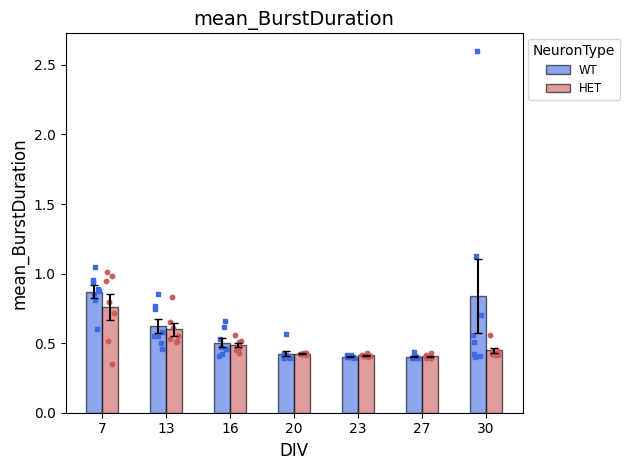

In [14]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst', 'mean_Burst_Peak_Abs',
     'mean_BurstDuration']





dirpath = '/srv/network_analysis_outputs/shank3_1_t3/graphs/without_outlier'

for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')